In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from src.load_data import *
from src.graphs import *
from src.statistical_tests import *

# df = pd.read_excel('all_info/nowe_poprawione_wersja_janka.xlsx', sheet_name='wszystkie dane poprawione')
### df.to_csv('nowe_poprawione_dane.csv', index = False)

## Few notes:
* **total_clearance_between_visit** - wzgledem poprzedniej wizyty
* **clearance_between_visit** - wzgledem poczatku
* we group to **nereast** time group 


#### To-dos:
* Sprawdz ilosc grup z peaku w gory!
* Sprawdzic linear fit i non-linear fit
* Sprawdz rozne 
* Sprawdz methodologie
* Sila statystyczna (p-value)
* Sprawdz rozne kwartaly
* Pogrobic linie

#### Few **old** notes:
* The table above should include all information You need
* `wizyta po ilu zabiegach` -> can have some skipped zabiegy & can start at other point than 0
* `czas` -> defined as czas between this and next visit



# Hard-Coded Area:

In [2]:
non_moved_df = get_data(format_type='all')
moved_df = get_data(format_type='moved_to_0')
non0s_df = get_data(format_type='all_without_0s')

print('looking at the moved data:')
moved_df.head(10)

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
looking at the moved data:


,surname,time,summed_time,time_group,visit_number,total_clearance_effect_between_visit,total_clearence_effect_wzgledem_poczatku,------------,unmoved_visit_nr
0,1.Gasek,57,57,1,1,10.43594,10.435942,,1
1,1.Gasek,958,1015,4,2,-1.90988,8.725376,,2
2,1.Gasek,70,1085,1,3,-3.15234,5.848092,,3
3,1.Gasek,63,1148,1,4,26.20423,30.519873,,4
4,1.Gasek,238,1386,3,5,-0.99610,29.827784,,5
5,2. Kołodziejska,217,217,2,1,66.95658,66.956580,,1
6,2. Kołodziejska,42,259,0,2,20.93472,73.874130,,2
7,2. Kołodziejska,26,306,0,5,-59.55360,71.032640,,5
8,2. Kołodziejska,294,600,3,6,76.67272,93.242700,,6
9,4. Krzysztoń,35,66,0,1,-18.03010,-13.664000,,3


### Wyniki - totalna poprawa:

In [3]:
get_stats_for_abstract(df = None, format_type = 'all')

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
median of maximum total clearence: 59.09456
% of patients that had a total_clearence of minimum 25%: 81.9672131147541
% of patients that had a total_clearence of minimum 50%: 67.21311475409836
% of patients that had a total_clearence of minimum 75%: 24.59016393442623
% of patients that had a total_clearence of minimum 90%: 4.918032786885246


,surname,total_clearence_effect_wzgledem_poczatku
0,1.Gasek,30.519873
1,10.Będzinowski szyja,70.360110
2,11. Cicha-kwiecień,52.934780
3,12. Januszewska,60.984150
4,13.Zborowski,77.379030
...,...,...
56,7. Kowal,82.977240
57,70. Wójcicki,83.173308
58,71. Zając,9.855161
59,8.Wierny,71.835400


In [4]:
get_stats_for_abstract2(df = None, format_type = 'all', visit_number_buckets = [0,2,5,10,15,20])

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
bucket: 2
bucket: 5
bucket: 10
bucket: 15
bucket: 20
[28.46557, 45.48351, 56.577381579999994, 56.97438, 56.9571]


,surname,total_clearence_effect_wzgledem_poczatku
0,1.Gasek,30.519873
1,10.Będzinowski szyja,60.169450
2,11. Cicha-kwiecień,52.934780
3,12. Januszewska,60.984150
4,13.Zborowski,77.379030
...,...,...
56,7. Kowal,82.977240
57,70. Wójcicki,83.173308
58,71. Zając,9.855161
59,8.Wierny,71.835400


In [5]:
# Print some overall info such as:
# nr of people w. different number of visits
# nr of people in different waiting buckets

# Main Graphs
### Total clearence compared to start:

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]


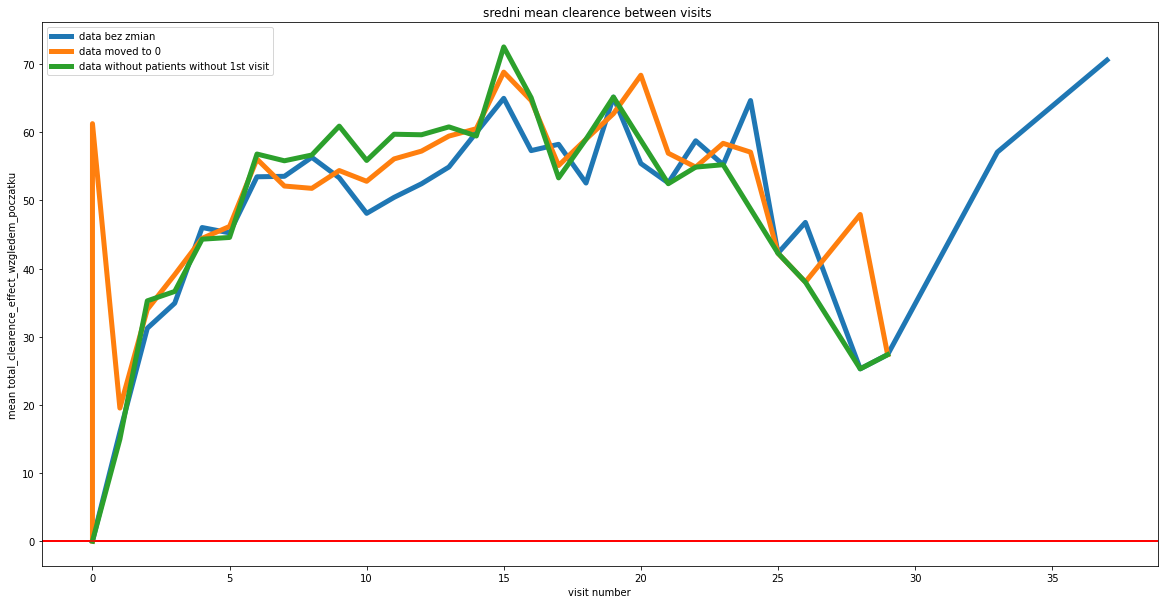

In [6]:
plt.figure(figsize=(20,10))
data = get_data(format_type='all',remove_minus_ones = False )
data2 = get_data(format_type='moved_to_0',remove_minus_ones = False )
data3 = get_data(format_type='all_without_0s',remove_minus_ones = False )
agg_column_graph(data, label = 'data bez zmian', column = 'total_clearence_effect_wzgledem_poczatku')
agg_column_graph(data2, label = 'data moved to 0', column = 'total_clearence_effect_wzgledem_poczatku')
agg_column_graph(data3, label = 'data without patients without 1st visit', column = 'total_clearence_effect_wzgledem_poczatku')

### Srednia poprawa miedzy wizytami:

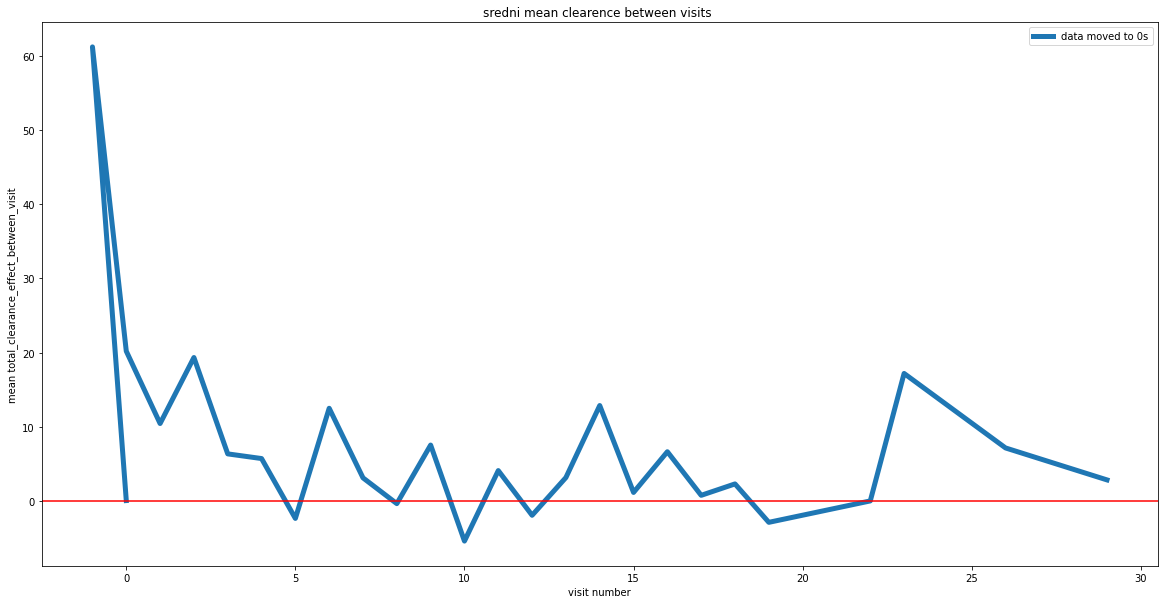

In [7]:
plt.figure(figsize=(20,10))
plt.title("srednia poprawa miedzy wizytami")
agg_column_graph(moved_df, label = 'data moved to 0s')
plt.legend()

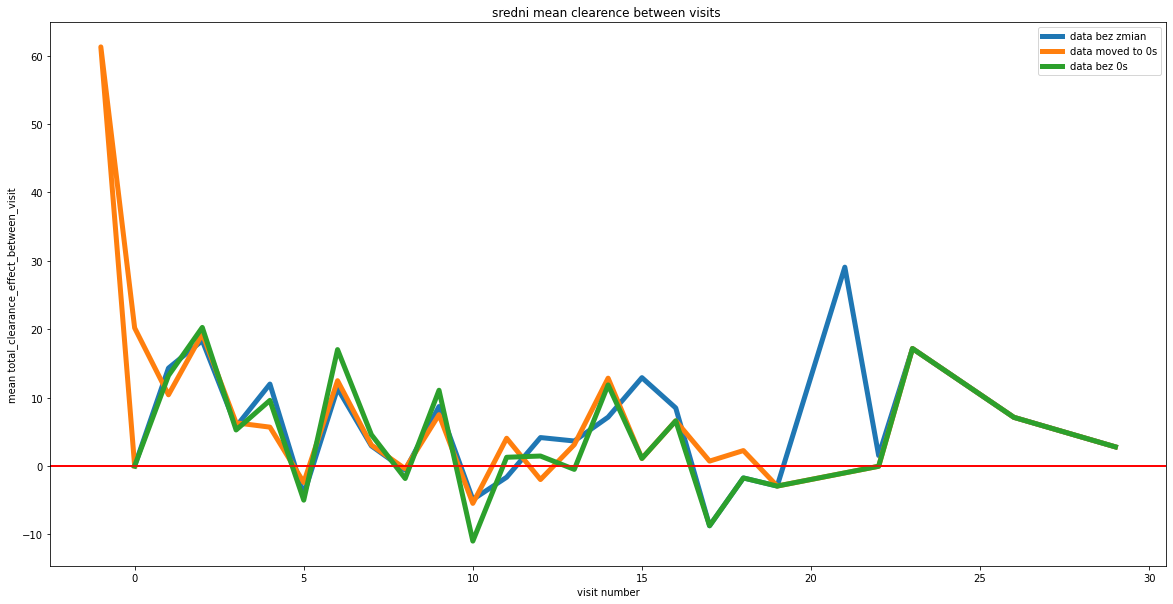

In [8]:
plt.figure(figsize=(20,10))
agg_column_graph(non_moved_df, label = 'data bez zmian', column = 'total_clearance_effect_between_visit')
agg_column_graph(moved_df, label = 'data moved to 0s', column = 'total_clearance_effect_between_visit')
agg_column_graph(non0s_df, label = 'data bez 0s', column = 'total_clearance_effect_between_visit')

### Showcase of how tests works:

In [9]:
chi_squared_test(non_moved_df.loc[non_moved_df['visit_number']> 0], name = 'example test', display_data = False)


p-value of chi squred contigency test for example test: 0.013965065006641913 (w. Yates correction - good practice)


No handles with labels found to put in legend.


Pearsons correlation of the linear fit for : -0.894 (very bad practice though)
p-value of chi squred contigency test for : 0.3002378804182834 (w. Yates correction - good practice)



,nr_visit_group,patients_in_bucket
0,0,201
1,10,123
2,20,19


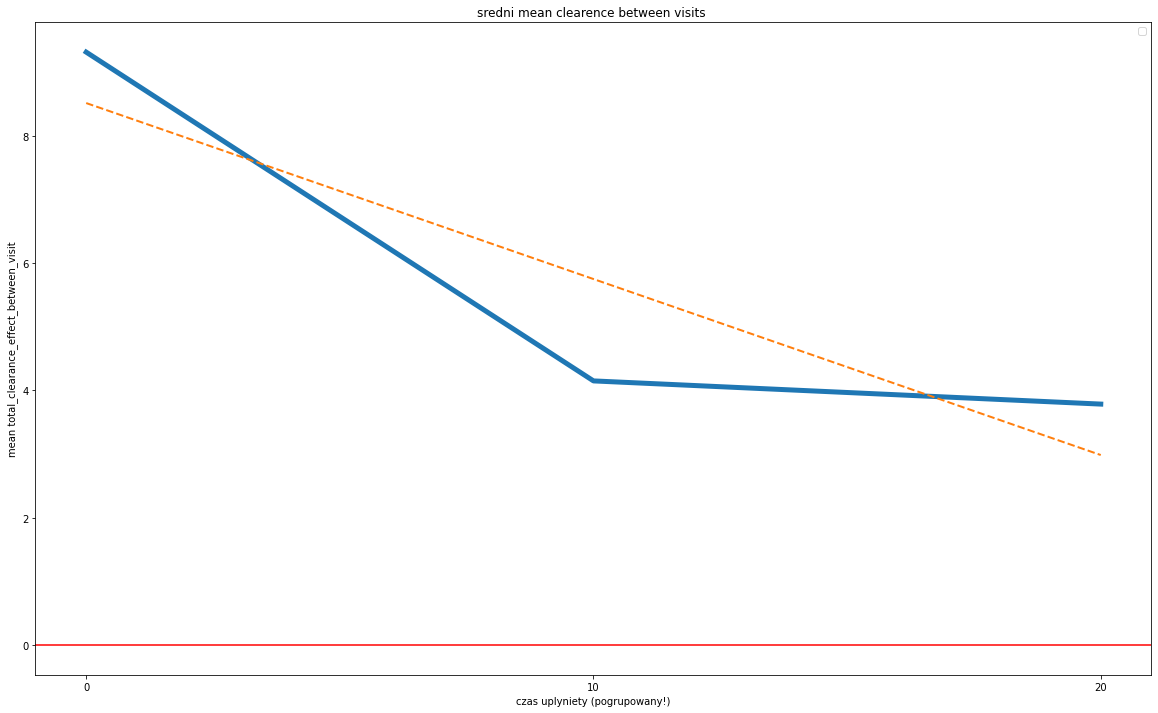

In [10]:
plt.figure(figsize=(20,12))
time_group_based_avg_graph(moved_df, 
                           GROUPS = [0,10,20], 
                           increment = 10, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearance_effect_between_visit')

Pearsons correlation of the linear fit for nie przesunieci: -0.578 (very bad practice though)
p-value of chi squred contigency test for nie przesunieci: 0.11550297843162574 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for przesunieci: -0.656 (very bad practice though)
p-value of chi squred contigency test for przesunieci: 0.03706652483286407 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for usunieci bez 1 wizyty: -0.753 (very bad practice though)
p-value of chi squred contigency test for usunieci bez 1 wizyty: 0.06290285247023715 (w. Yates correction - good practice)



,nr_visit_group,patients_in_bucket nie przesunieci
0,0,79
1,5,141
2,10,75
3,15,36
4,20,12


Text(0.5, 0, 'nr_visits_group')

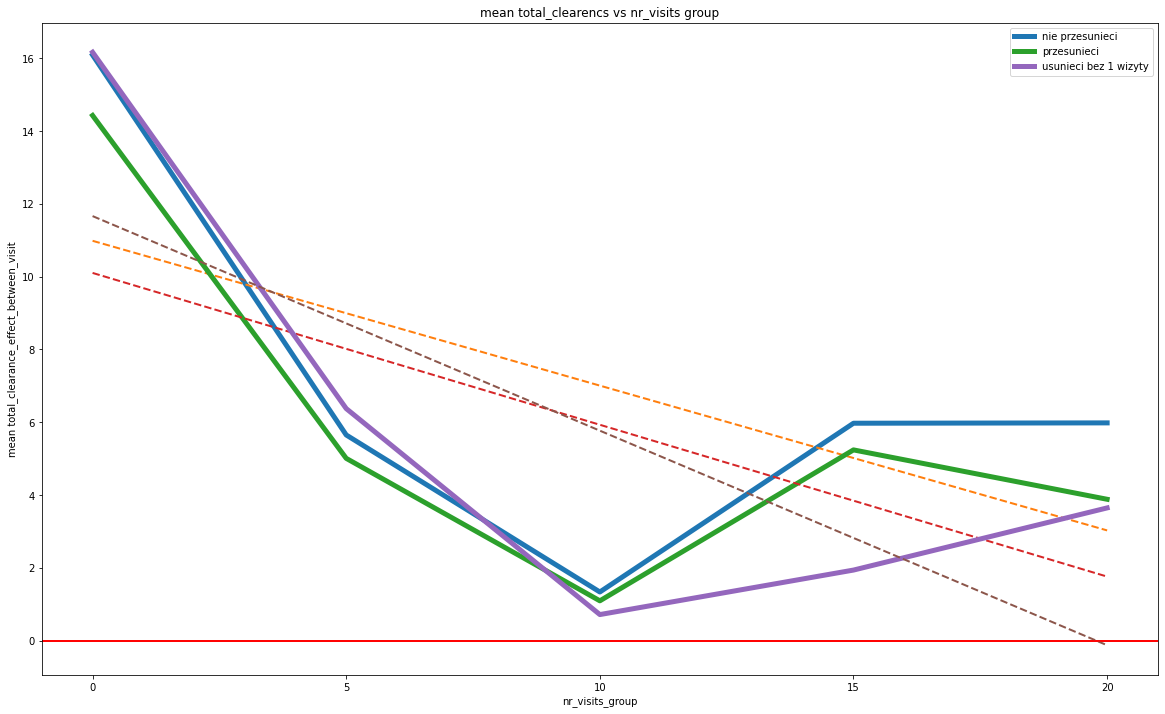

In [11]:
plt.figure(figsize=(20,12))
a = time_group_based_avg_graph(non_moved_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearance_effect_between_visit',
                           label = 'nie przesunieci')
time_group_based_avg_graph(moved_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearance_effect_between_visit',
                           label = 'przesunieci')

time_group_based_avg_graph(non0s_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearance_effect_between_visit',
                           label = 'usunieci bez 1 wizyty')
display(a)
plt.title('mean total_clearencs vs nr_visits group')
plt.xlabel('nr_visits_group')

## Time Group based avg graphs:
* Removed graphs for patients after 15th and 20th visit - since there is barely any data there

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.388 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: 0.9313411792965804 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.512 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: 0.46027335994967555 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.609 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.17010665173629136 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.730 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.08234574963689821 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,53,105,136,182
1,100,19,68,94,119
2,200,12,30,34,42


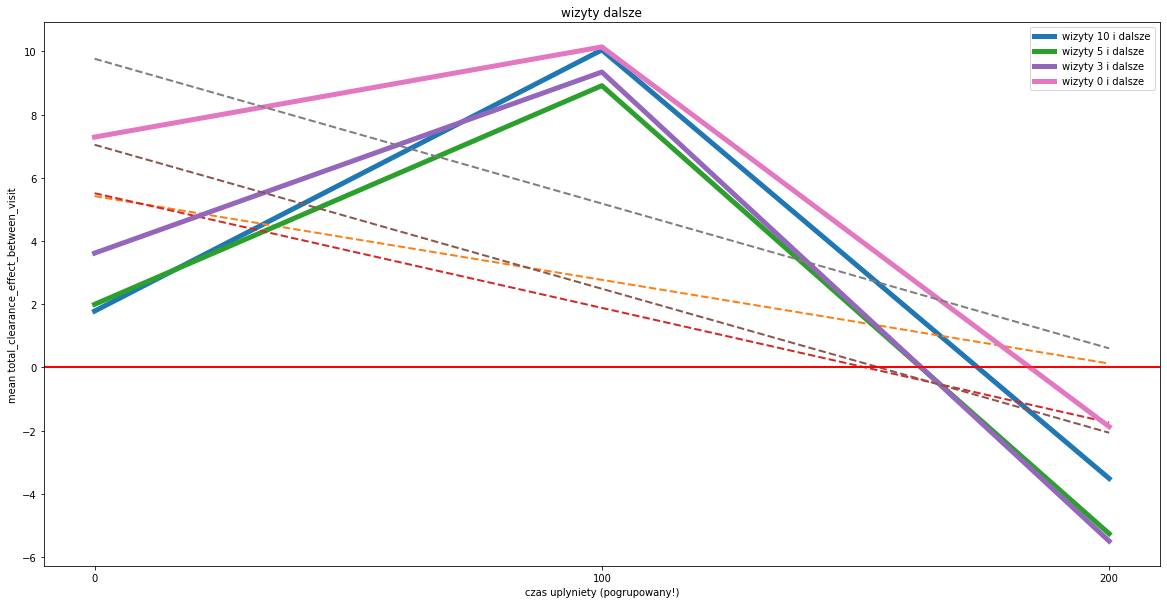

In [12]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,100,200], increment = 100)

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.943 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.922 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: 0.42074670722266405 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.909 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.03584718521359921 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.895 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.00320739171700968 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,68,157,209,276
1,200,15,43,49,57
2,400,1,3,6,10


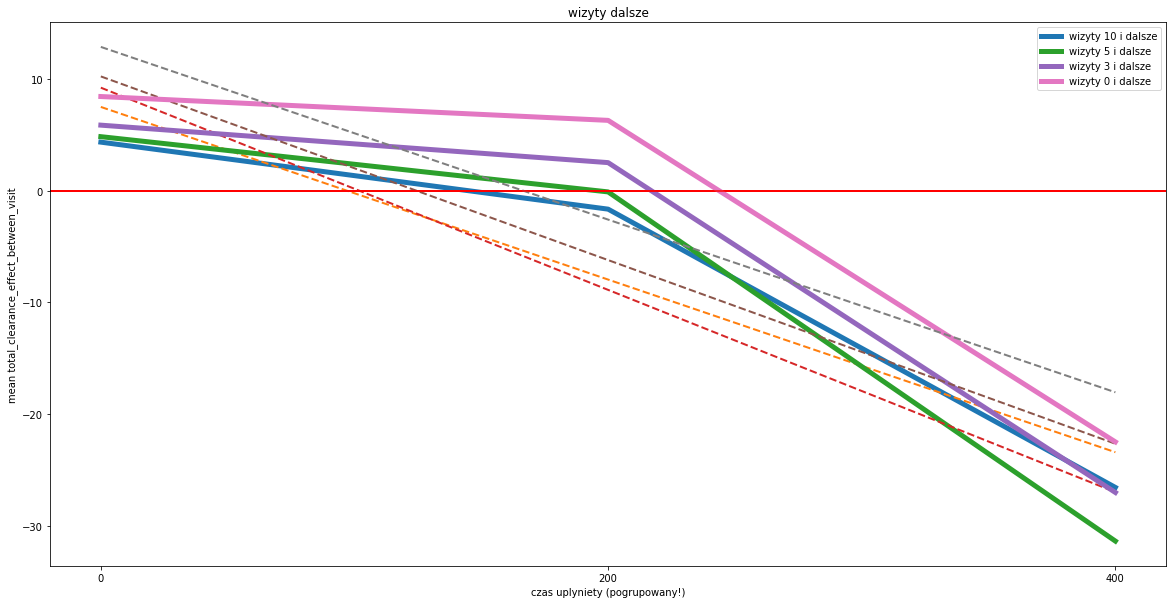

In [13]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,200,400], increment = 200)

In [14]:
# graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,100,200,300], increment = 100) # I dont like this one

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.820 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.847 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: 0.5501818931996454 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.850 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.043716626036851634 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.881 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.0057701342905184414 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,56,120,157,214
1,120,17,57,78,94
2,240,10,23,23,25
3,360,1,3,6,10


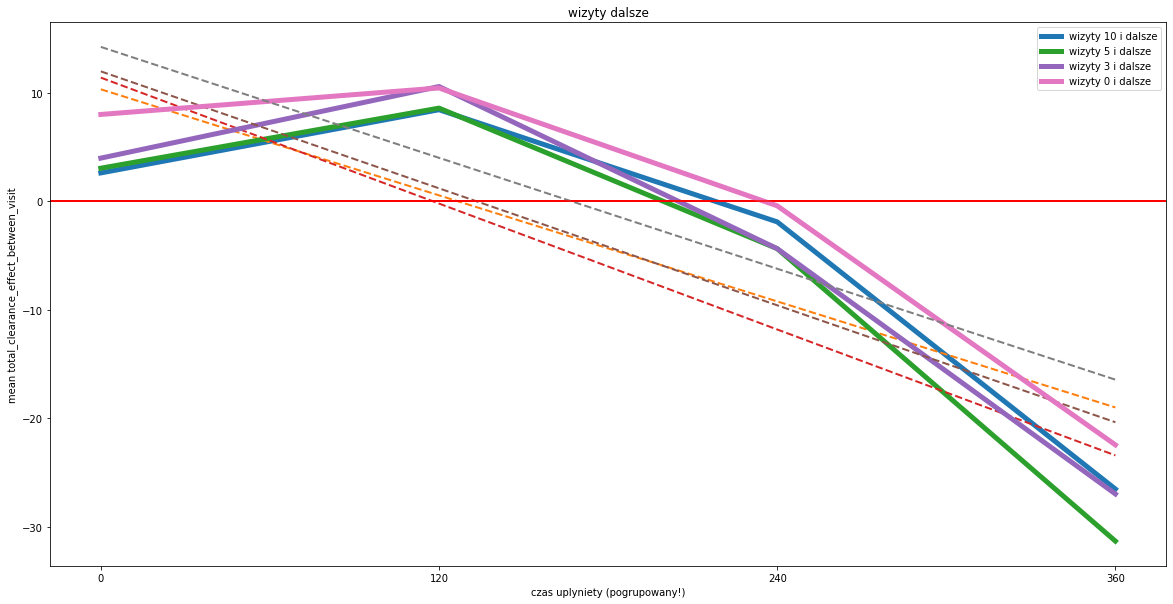

In [15]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,120,240,360], increment = 120)

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.778 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.720 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: 0.5452673500985242 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.747 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: 0.09120632529942849 (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.757 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: 0.013965065006641913 (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,47,95,121,159
1,90,24,73,103,135
2,180,10,22,24,28
3,270,2,10,10,11
4,360,1,3,6,10


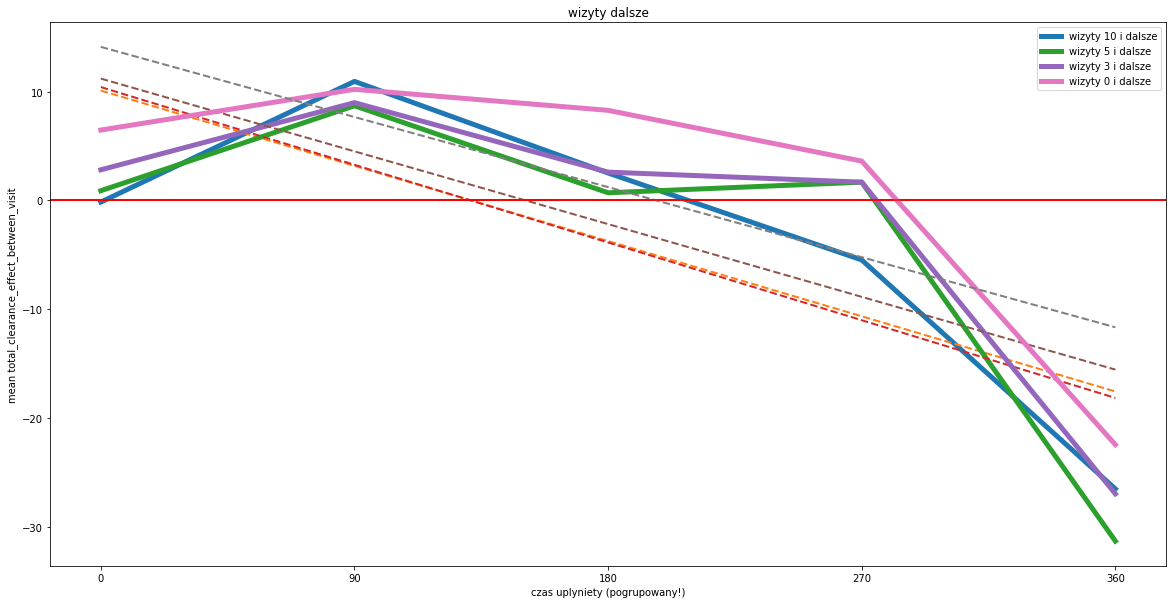

In [16]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,90,180,270,360], increment=90)

Pearsons correlation of the linear fit for wizyty 10 i dalsze: -0.571 (very bad practice though)
p-value of chi squred contigency test for wizyty 10 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 5 i dalsze: -0.339 (very bad practice though)
p-value of chi squred contigency test for wizyty 5 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 3 i dalsze: -0.397 (very bad practice though)
p-value of chi squred contigency test for wizyty 3 i dalsze: nan (w. Yates correction - good practice)

Pearsons correlation of the linear fit for wizyty 0 i dalsze: -0.405 (very bad practice though)
p-value of chi squred contigency test for wizyty 0 i dalsze: nan (w. Yates correction - good practice)



,time_group,patients_in_bucket wizyty 10 i dalsze,patients_in_bucket wizyty 5 i dalsze,patients_in_bucket wizyty 3 i dalsze,patients_in_bucket wizyty 0 i dalsze
0,0,1,1,1,1
1,30,46,94,120,158
2,60,18,41,61,84
3,90,5,25,32,38
4,120,1,7,10,13
5,150,1,6,8,10
6,180,5,9,9,10
7,210,4,7,7,8
8,240,1,5,5,6
9,270,1,3,3,3


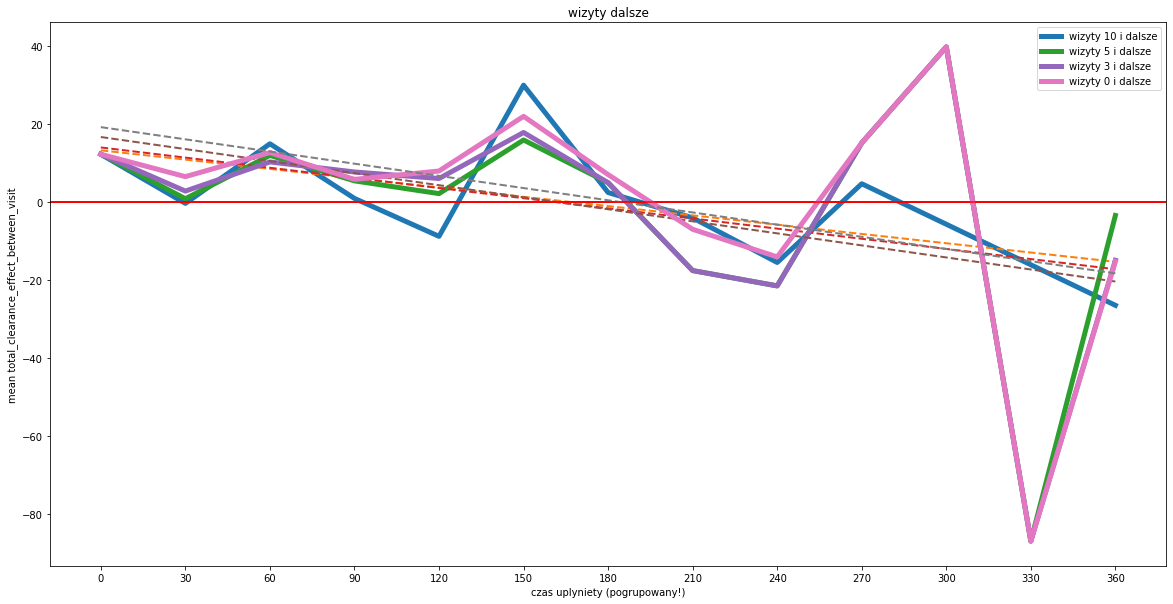

In [17]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,30,60,90,120,150,180,210,240,270,300,330,360], increment=30)

### All users plots:

In [18]:
# plot_all_users(non_moved_df, title = 'data bez zmian')
# plot_all_users(moved_df, title = 'data moved to 0s')
# plot_all_users(non0s_df, title = 'data bez 0s')

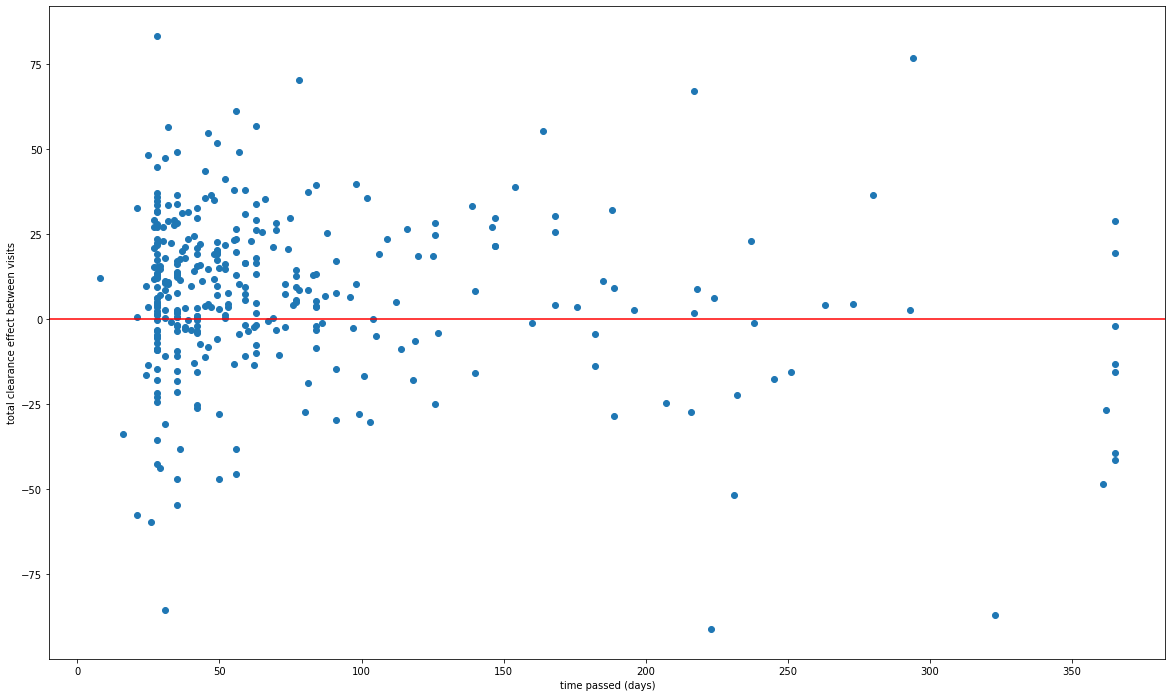

In [19]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 5th visit', label2 ='line fit to ALL data' ,plot_linear_fit = False)

## Scatter plots - dependent on visit:

Pearsons correlation: -0.131


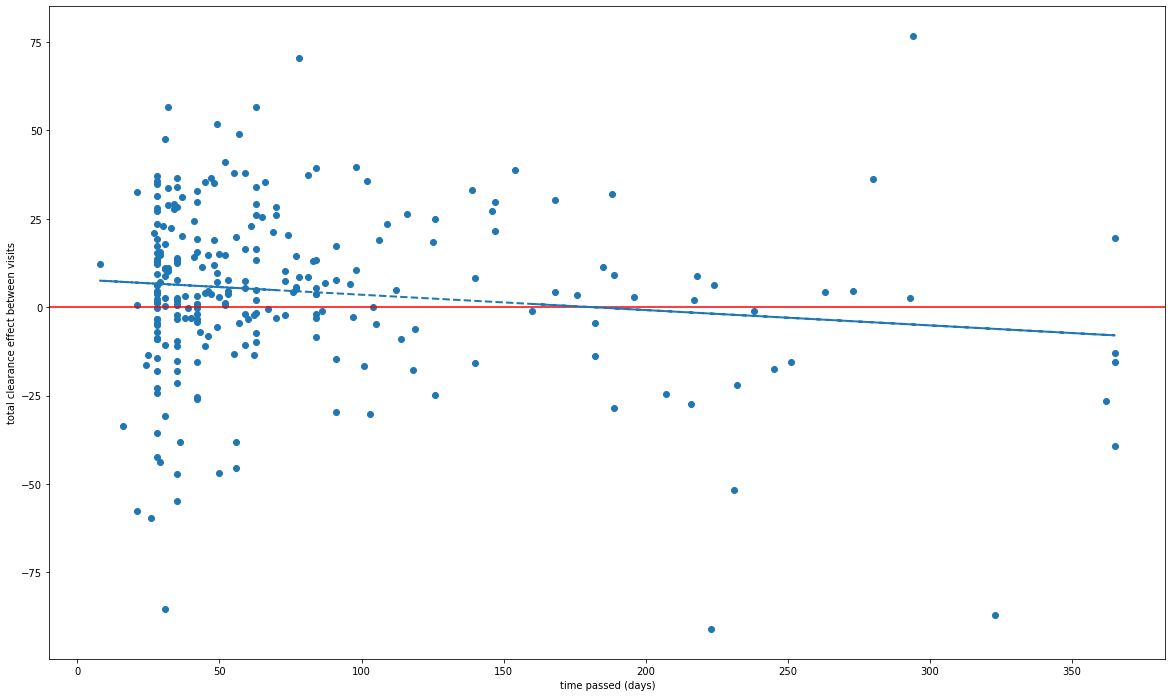

In [20]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 2], label = 'before or 5th visit', label2 ='line fit to ALL data' ,plot_linear_fit = True)

## Scatter plots - dependent on visit:

In [21]:
non_moved_df

,surname,time,summed_time,time_group,visit_number,total_clearance_effect_between_visit,total_clearence_effect_wzgledem_poczatku,------------,nr_visit_group,below 0
0,1.Gasek,57,57,4,1,10.435940,10.435942,,0,False
1,1.Gasek,958,1015,4,2,-1.909880,8.725376,,0,True
2,1.Gasek,70,1085,4,3,-3.152340,5.848092,,1,True
3,1.Gasek,63,1148,4,4,26.204230,30.519873,,1,False
4,1.Gasek,238,1386,4,5,-0.996100,29.827784,,1,True
...,...,...,...,...,...,...,...,...,...,...
338,70. Wójcicki,84,255,4,6,-1.909880,75.286637,,1,True
339,70. Wójcicki,84,339,4,7,-3.152340,69.913296,,1,True
340,70. Wójcicki,70,409,4,8,26.204230,83.173308,,2,False
341,70. Wójcicki,160,569,4,9,-0.996100,74.593279,,2,True


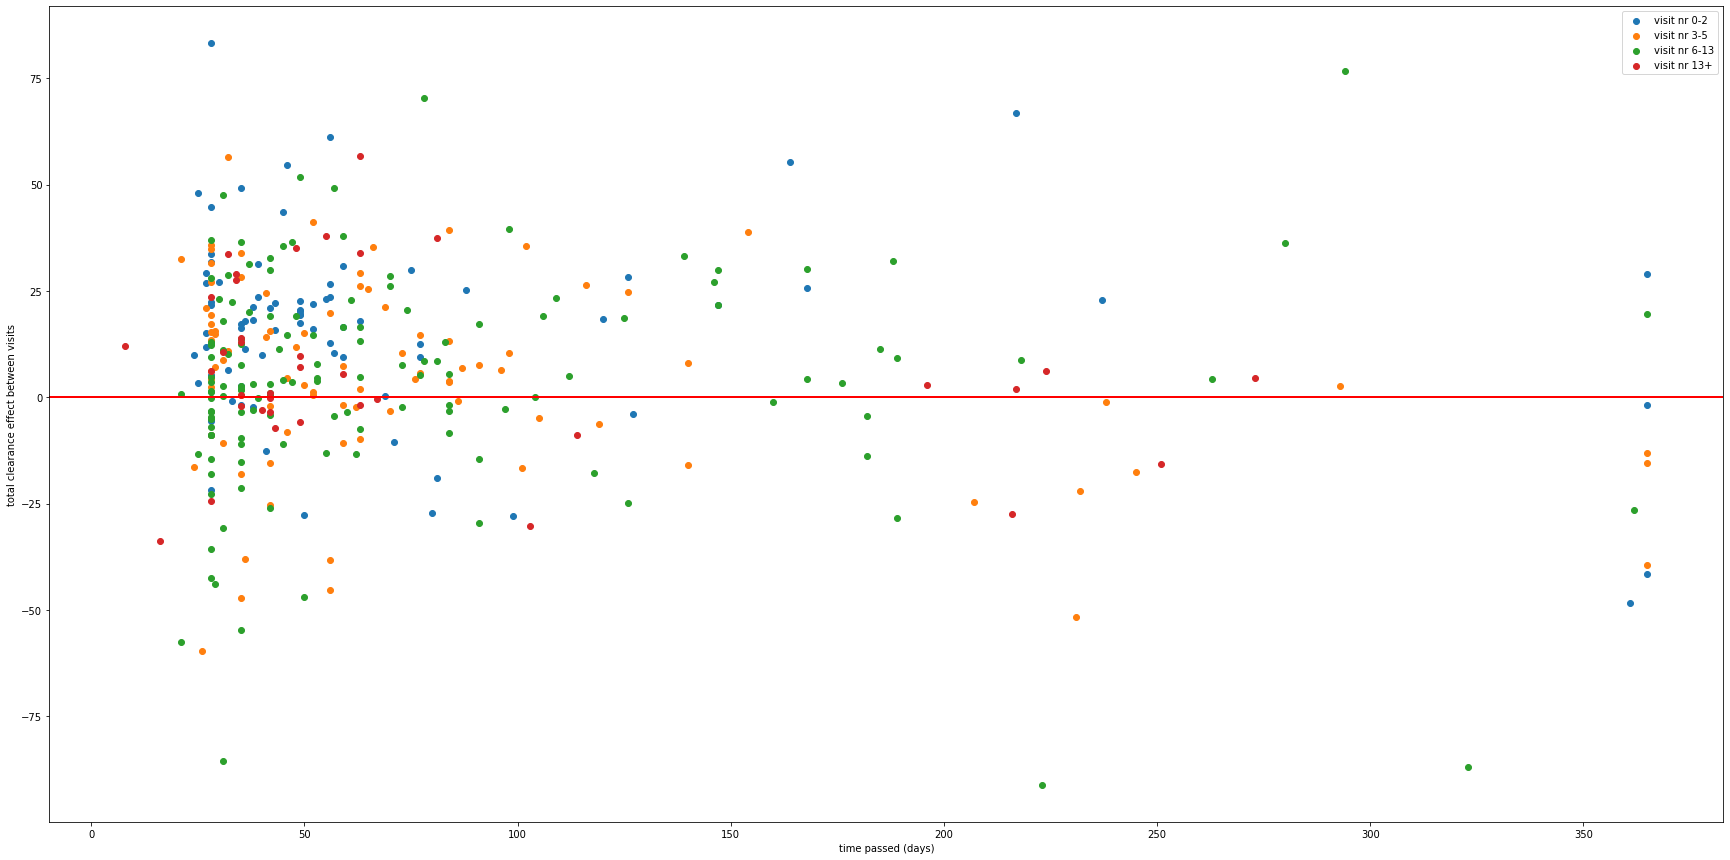

In [22]:
plt.figure(figsize=(30,15))

df1 = non_moved_df.loc[non_moved_df['visit_number'].isin([1,2])]
df2 = non_moved_df.loc[non_moved_df['visit_number'].isin([3,4,5])]
df3 = non_moved_df.loc[non_moved_df['visit_number'].isin([6,7,8,9,10,11,12,13])]
df5 = non_moved_df.loc[non_moved_df['visit_number'] > 13]


scatter_plot_against_time(df1, label = 'visit nr 0-2', plot_linear_fit= False)
scatter_plot_against_time(df2, label = 'visit nr 3-5', plot_linear_fit= False)
scatter_plot_against_time(df3, label = 'visit nr 6-13', plot_linear_fit= False)
scatter_plot_against_time(df5, label = 'visit nr 13+', plot_linear_fit= False)
plt.legend()

In [23]:
# weird_data = non_moved_df.loc[(non_moved_df['below 0'] == True) & (non_moved_df['time'] <75)] # Send to Michal & Professor
# weird_data.to_excel('dziwne_badania.xlsx')

Pearsons correlation: -0.153
Pearsons correlation: -0.131


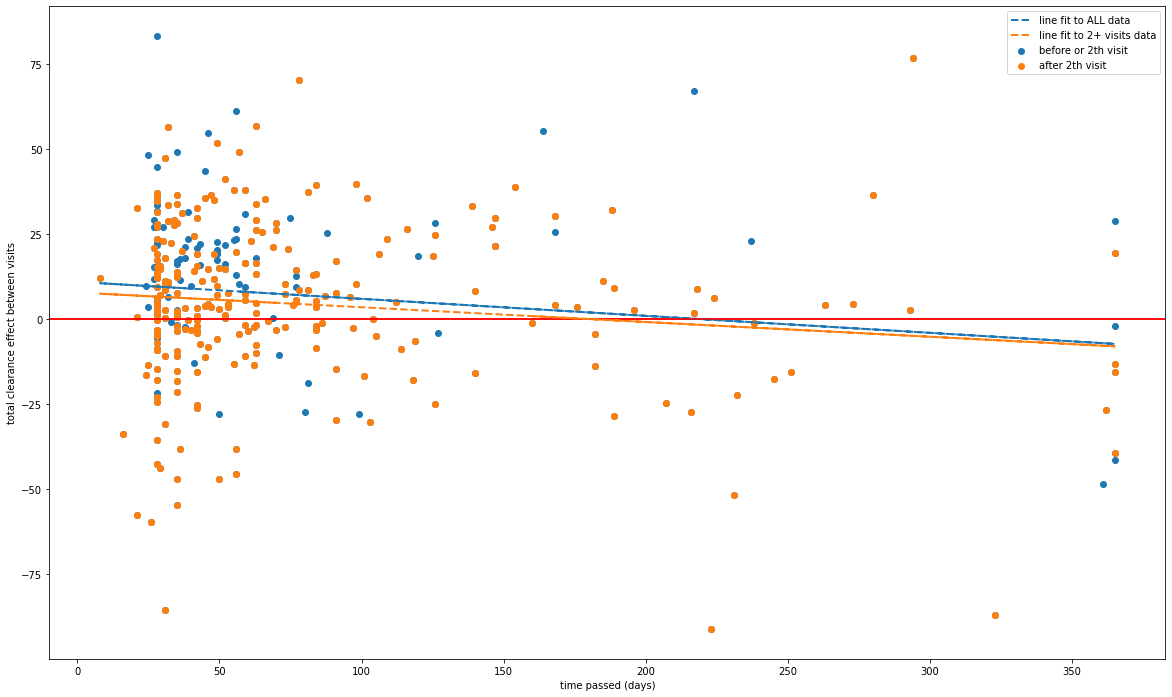

In [24]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 2th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 2], label = 'after 2th visit', label2= 'line fit to 2+ visits data')
plt.legend()

If time was longer than 360 I changed it to 360 to keep graph readable 

Pearsons correlation: -0.153
Pearsons correlation: -0.044


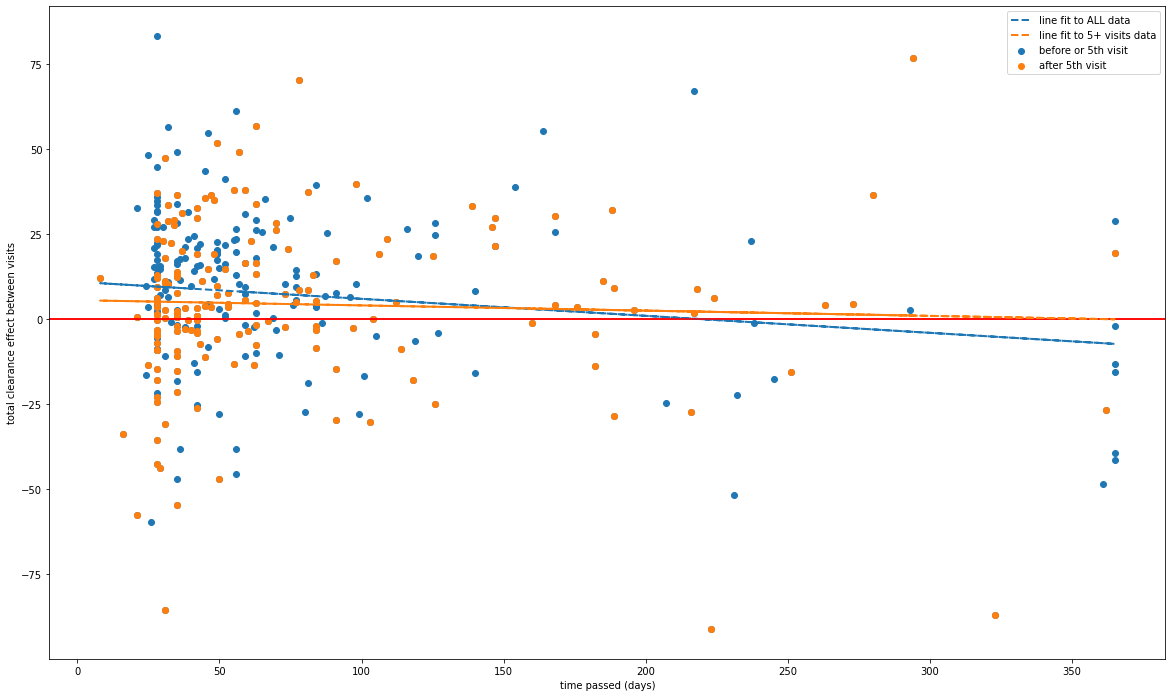

In [25]:
print('If time was longer than 360 I changed it to 360 to keep graph readable \n')

plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 5th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 5], label = 'after 5th visit', label2= 'line fit to 5+ visits data')
plt.legend()

Pearsons correlation: -0.153
Pearsons correlation: -0.216


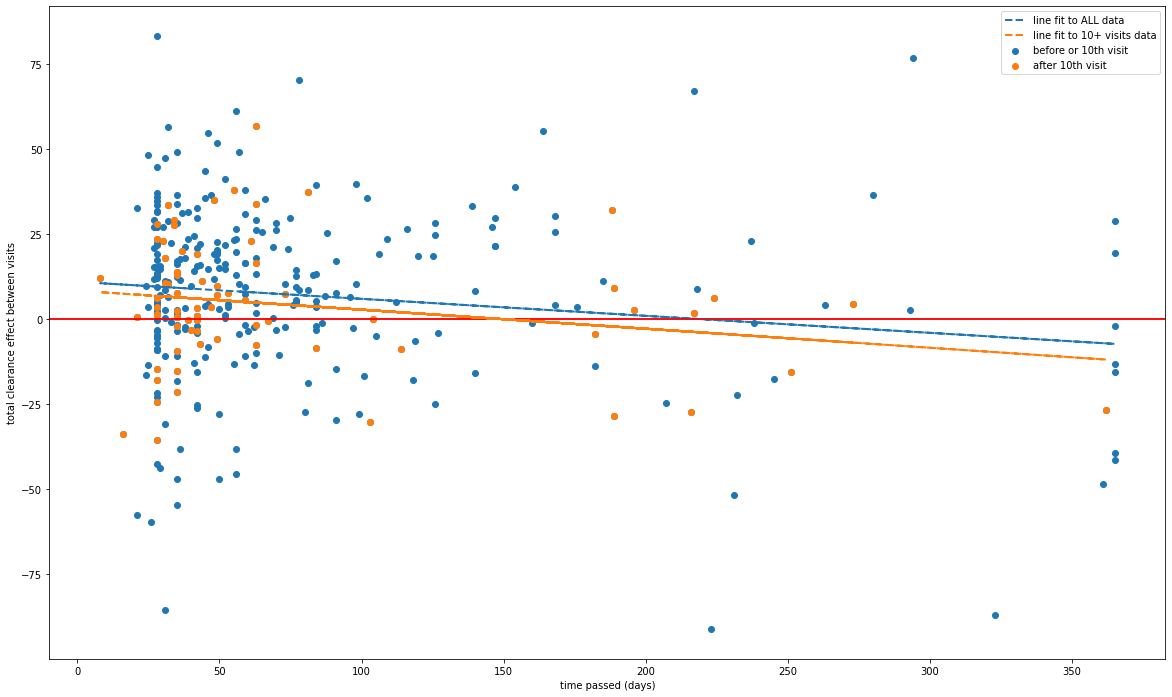

In [26]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 10th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 10], label = 'after 10th visit', label2= 'line fit to 10+ visits data')
plt.legend()

Pearsons correlation: -0.153
Pearsons correlation: -0.282


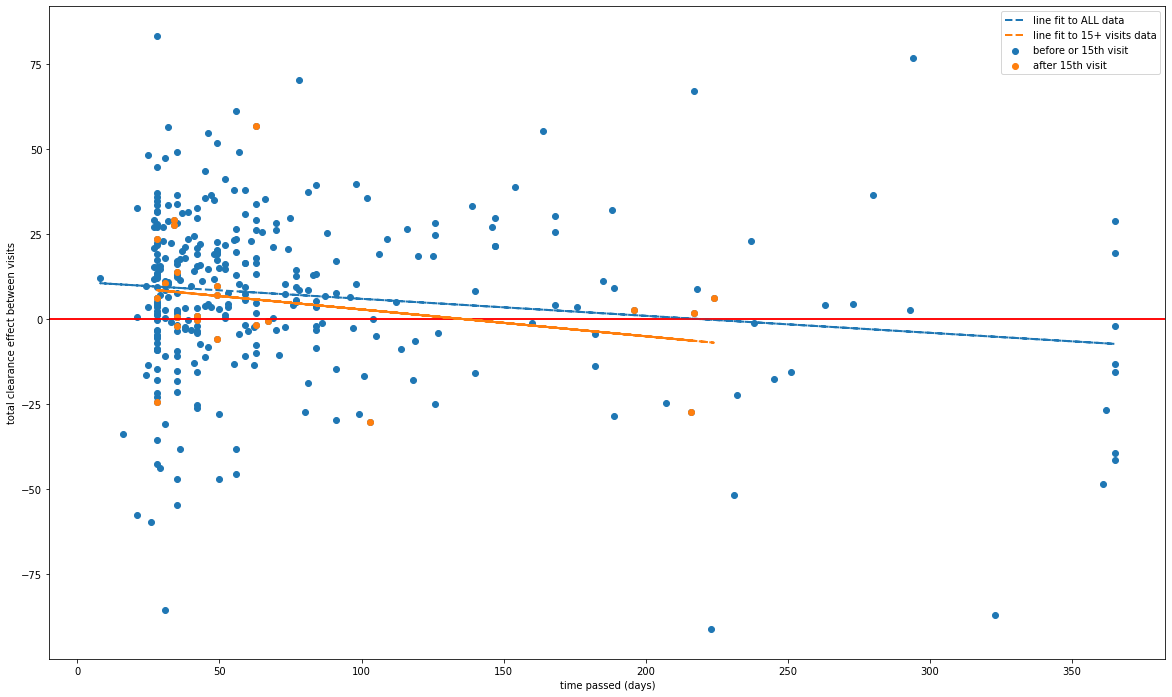

In [27]:
plt.figure(figsize=(20,12))
scatter_plot_against_time(non_moved_df, label = 'before or 15th visit', label2 ='line fit to ALL data')
scatter_plot_against_time(non_moved_df.loc[non_moved_df['visit_number'] > 15], label = 'after 15th visit', label2= 'line fit to 15+ visits data')
plt.legend()

### Scatted plots - divided into time groups:

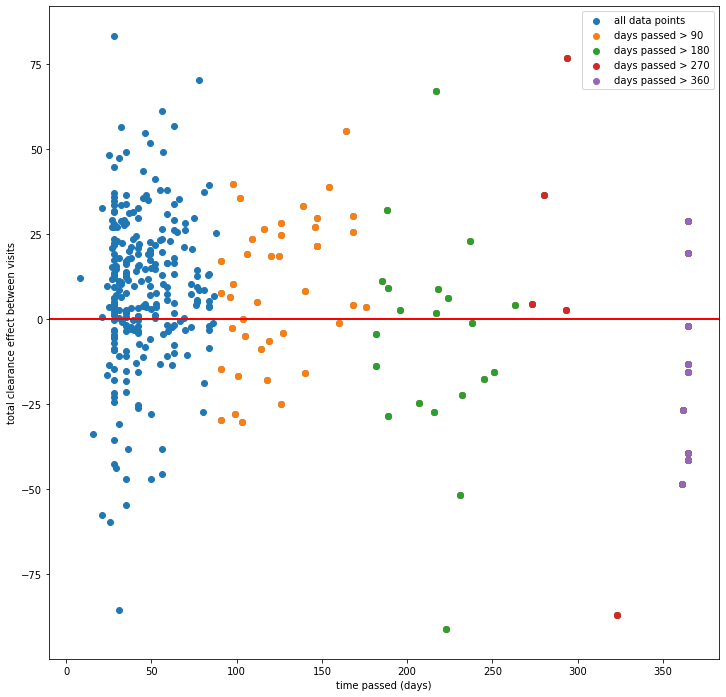

In [28]:
plt.figure(figsize=(12,12))
df0 = non_moved_df
df1 = non_moved_df.loc[non_moved_df['time'] > 90]
df2 = non_moved_df.loc[non_moved_df['time'] > 180]
df3 = non_moved_df.loc[non_moved_df['time'] > 270]
df4 = non_moved_df.loc[non_moved_df['time'] > 360]


scatter_plot_against_time(df0, label = 'all data points', label2 ='line fit to ALL data',plot_linear_fit = False)
scatter_plot_against_time(df1, label = 'days passed > 90', label2 ='',plot_linear_fit = False)
scatter_plot_against_time(df2, label = 'days passed > 180', label2 ='',plot_linear_fit = False)
scatter_plot_against_time(df3, label = 'days passed > 270', label2 ='',plot_linear_fit = False)
scatter_plot_against_time(df4, label = 'days passed > 360', label2 ='',plot_linear_fit = False)
plt.legend()

Pearsons correlation: -0.153
Pearsons correlation: -0.237
Pearsons correlation: -0.139
Pearsons correlation: -0.401


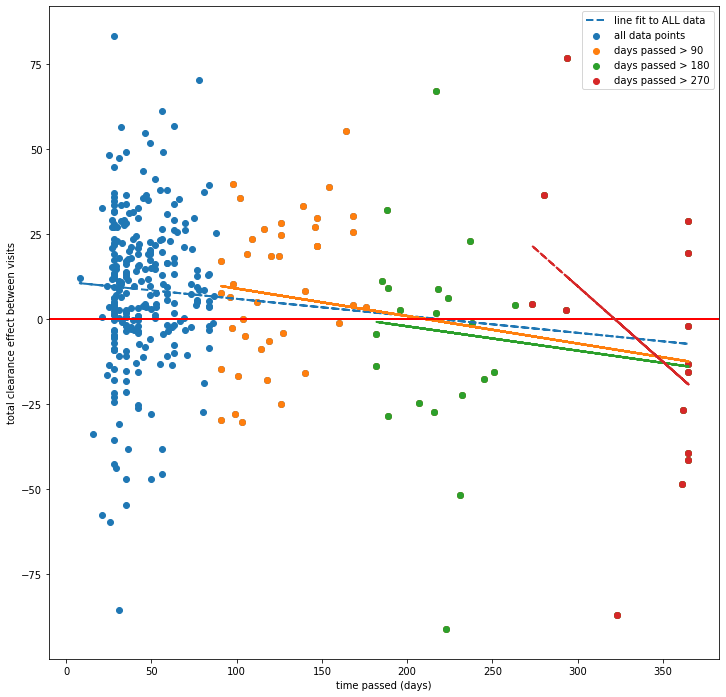

In [29]:
plt.figure(figsize=(12,12))
df0 = non_moved_df
df1 = non_moved_df.loc[non_moved_df['time'] > 90]
df2 = non_moved_df.loc[non_moved_df['time'] > 180]
df3 = non_moved_df.loc[non_moved_df['time'] > 270]


scatter_plot_against_time(df0, label = 'all data points', label2 ='line fit to ALL data')
scatter_plot_against_time(df1, label = 'days passed > 90', label2 ='')
scatter_plot_against_time(df2, label = 'days passed > 180', label2 ='')
scatter_plot_against_time(df3, label = 'days passed > 270', label2 ='')
plt.legend()

## Scatter plots - clearnce vs visit_nr

Pearsons correlation: -0.124


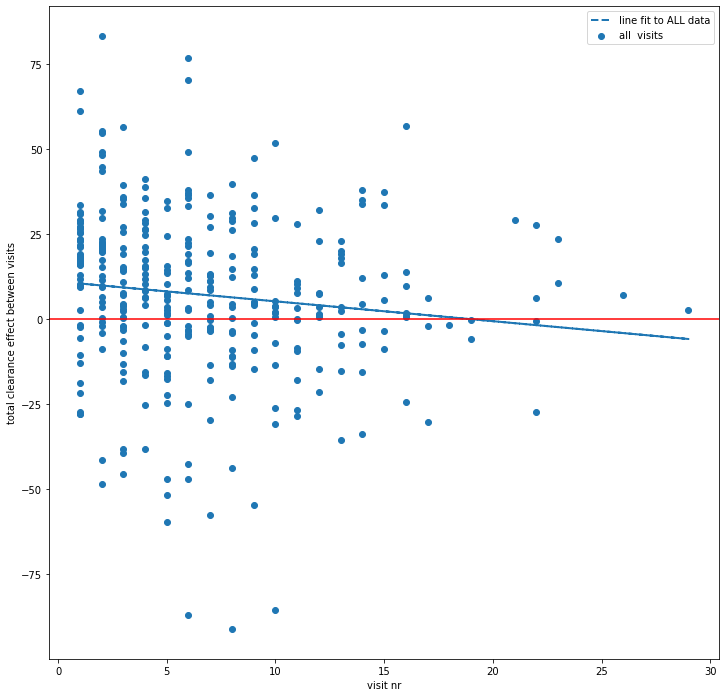

In [30]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data')
plt.legend()

##### Botplox explained:
<img src="boxplot_explained.png"
     alt="boxplot explained"/>

No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

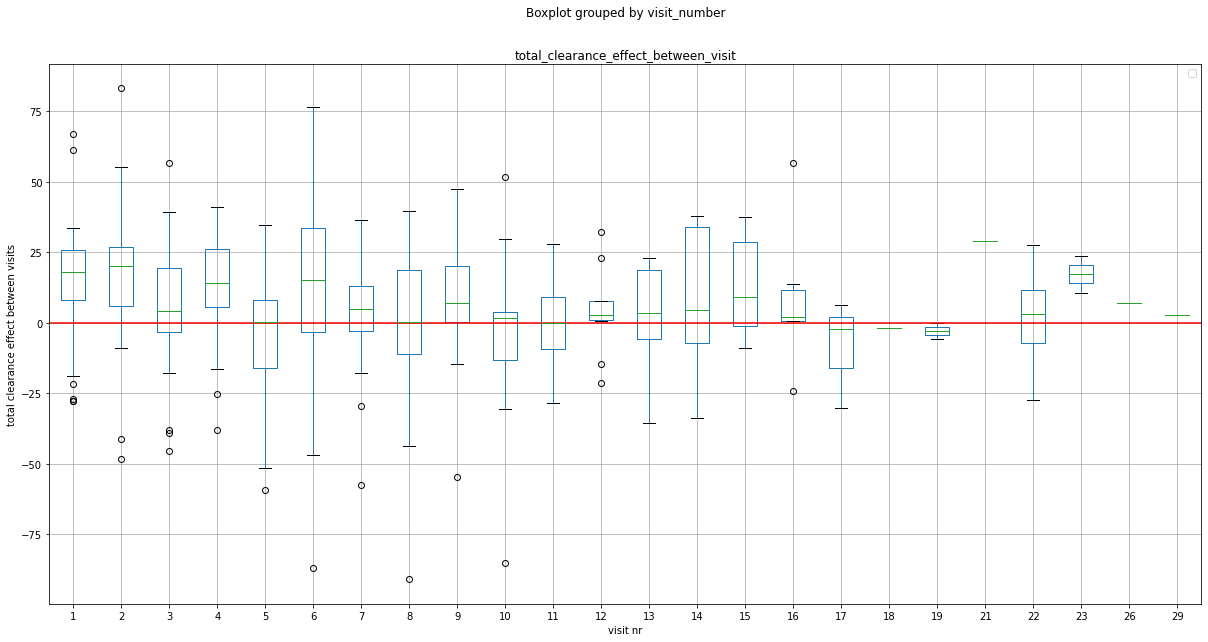

In [31]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data', plot_type='box', plot_linear_fit = False)
plt.legend()

Pearsons correlation: -0.040


<Figure size 864x864 with 0 Axes>

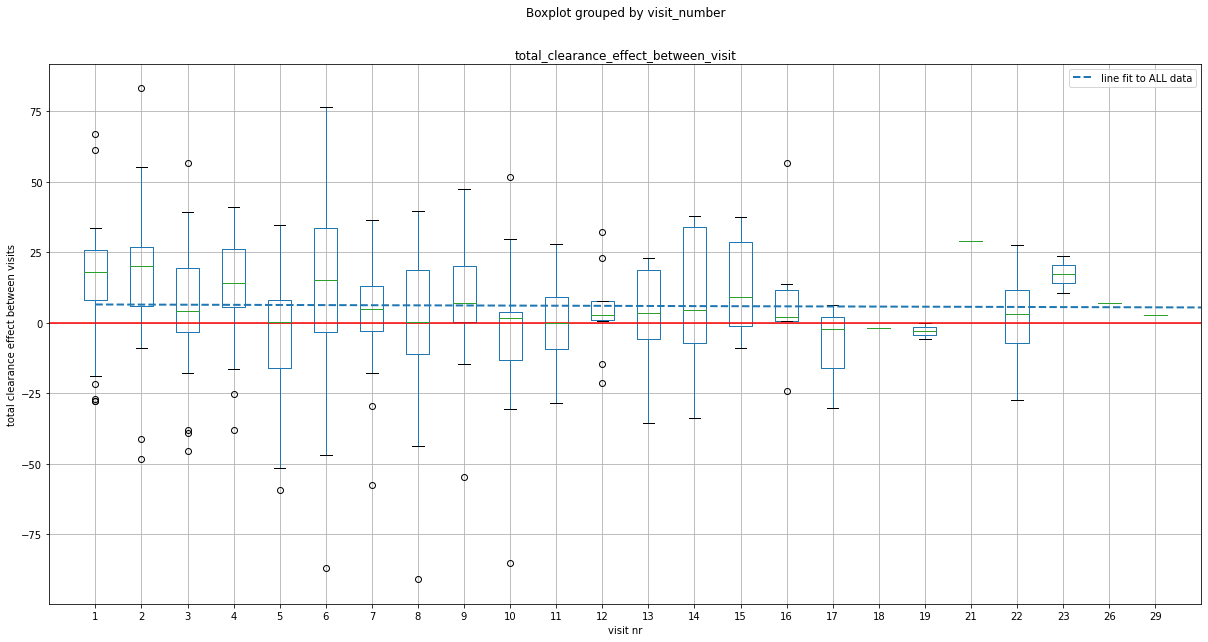

In [32]:
plt.figure(figsize=(12,12))
scatter_plot_against_visit_nr(non_moved_df, label = 'all  visits', label2 ='line fit to ALL data', plot_type='box', plot_linear_fit = True)
plt.legend()

### Statistical comparison of the means between 2 samples (data divided based on time)

In [33]:

for days_passed_threshold in [60,120,180,240,300,360]:
    print()
    ttest_against_time_threshold(non_moved_df, 
                                 time_threshold = days_passed_threshold, 
                                 related_ttest = False)




test for days passsed: 60
left mean: 7.989
right mean: 5.775
p_value: 0.2051


test for days passsed: 120
left mean: 8.182
right mean: 1.665
p_value: 0.0339


test for days passsed: 180
left mean: 8.734
right mean: -6.728
p_value: 0.0001


test for days passsed: 240
left mean: 7.938
right mean: -7.831
p_value: 0.0041


test for days passsed: 300
left mean: 8.046
right mean: -22.468
p_value: 0.0


test for days passsed: 360
left mean: 7.761
right mean: -15.302
p_value: 0.0022


### Statistical comparison of the means between 2 samples (data divided based on nr of visits)

In [40]:
for visit_nr_threshold in [2,5,10,15,20,25]:
    print(f'TEST FOR FOR NR VISITORS: {visit_nr_threshold}')
    ttest_against_time_threshold(non_moved_df,
                                 visit_nr_threshold=visit_nr_threshold, 
                                 related_ttest = False)
                                 
    ttest_against_time_threshold(non_moved_df,
                                 visit_nr_threshold=visit_nr_threshold, 
                                 related_ttest = True)
    print('\n\n\n')

TEST FOR FOR NR VISITORS: 2

test for nr visits: 2
left mean: 16.088
right mean: 4.483
p_value: 0.0001

test for nr visits: 2
left mean: 16.088
right mean: 1.688
p_value: 0.0002




TEST FOR FOR NR VISITORS: 5

test for nr visits: 5
left mean: 9.998
right mean: 4.428
p_value: 0.016

test for nr visits: 5
left mean: 9.998
right mean: 4.427
p_value: 0.0132




TEST FOR FOR NR VISITORS: 10

test for nr visits: 10
left mean: 7.896
right mean: 4.322
p_value: 0.133

test for nr visits: 10
left mean: 2.949
right mean: 4.322
p_value: 0.6329




TEST FOR FOR NR VISITORS: 15

test for nr visits: 15
left mean: 7.32
right mean: 4.768
p_value: 0.3157

test for nr visits: 15
left mean: 2.557
right mean: 4.768
p_value: 0.6211




TEST FOR FOR NR VISITORS: 20

test for nr visits: 20
left mean: 7.111
right mean: 8.824
p_value: 0.5832

test for nr visits: 20
left mean: 15.066
right mean: 8.824
p_value: 0.3488




TEST FOR FOR NR VISITORS: 25

test for nr visits: 25
left mean: 7.169
right mean: 4.95
p_va

# Exploratory area:

### New task by professor:
`Sprawdzic czy pierwsze dwie wizyty po x dlugosci czasu (90, 180, 270, 360 dni) maja dobre wymiary - tak jak pierwsze dwie wizyty → range for the beginning and the end`

In [35]:
def get_visits_after_wait_time_x(df_, x, limit_on = True):
    '''
    df - pd.DataFrame with data
    x - int time after visits (put a min limit to x - to be 90 days), althought that limit can be turned off
    '''
    if limit_on:
        if x < 90:
            raise Exception('The min x limit is on. The X (nr of days) should be 90 or bigger.')


    # Get data
    df = get_data(format_type='all')
    return_df = pd.DataFrame()
    for surname in df.surname.unique():
        sub_df = df.loc[df['surname'] == surname]
        # print('sub_df:')
        # display(sub_df)
        # print()
        for index, data in enumerate(sub_df.iterrows()):
            _, visit = data
            if visit['time'] >= x:
                # print('sub_df,iloc[index:')
                # print(index)
                # display(sub_df.iloc[index:])
                # print()
                return_df = return_df.append(sub_df.iloc[index:], ignore_index = True)
                break
    return return_df

In [36]:
non_moved_df = get_data(format_type='all')
after_function = get_visits_after_wait_time_x(non_moved_df, 120)

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]


default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]


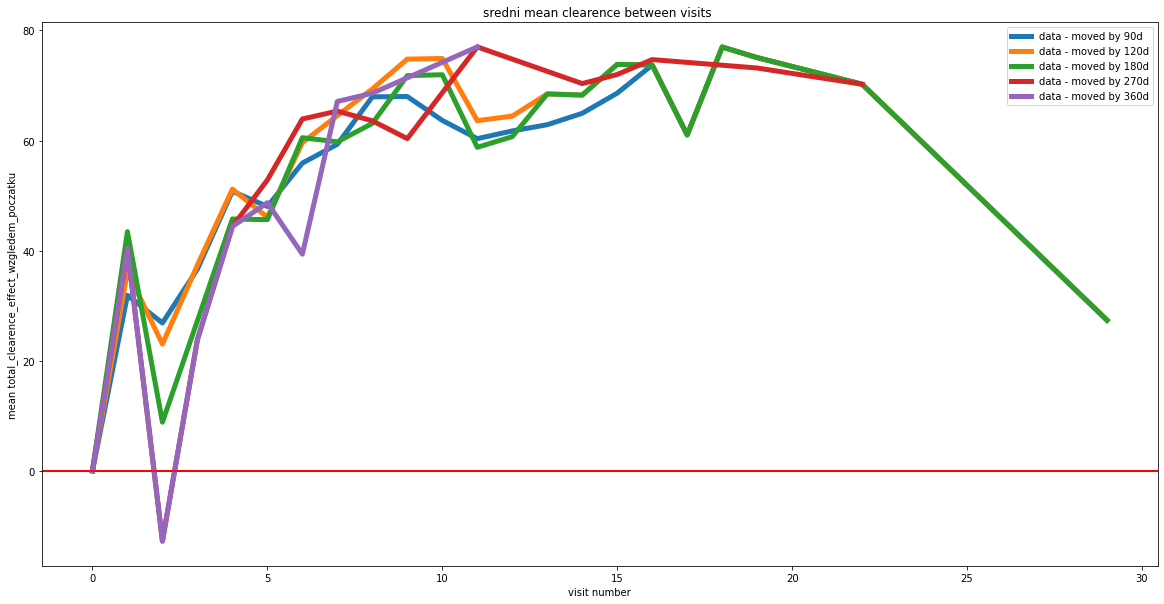

In [37]:
plt.figure(figsize=(20,10))
data = get_data(format_type='all',remove_minus_ones = False )

data = get_visits_after_wait_time_x(data, 90)
data2 = get_visits_after_wait_time_x(data, 120)
data3 = get_visits_after_wait_time_x(data, 180)
data4 = get_visits_after_wait_time_x(data, 270)
data5 = get_visits_after_wait_time_x(data, 360)


agg_column_graph(data, label = 'data - moved by 90d', column = 'total_clearence_effect_wzgledem_poczatku')
agg_column_graph(data2, label = 'data - moved by 120d', column = 'total_clearence_effect_wzgledem_poczatku')
agg_column_graph(data3, label = 'data - moved by 180d', column = 'total_clearence_effect_wzgledem_poczatku')
agg_column_graph(data4, label = 'data - moved by 270d', column = 'total_clearence_effect_wzgledem_poczatku')
agg_column_graph(data5, label = 'data - moved by 360d', column = 'total_clearence_effect_wzgledem_poczatku')

## Next steps (to be done by the end of the week)
1. Double check the data (try to automate it and then compare, or just look by the eye)
2. Add 4 new columns (changes in colours/area compared to beginning/previous visit)
3. Double check all calculations
4. Look into further statistics
